# House Price Prediction Model

This notebook implements a linear regression model to predict house prices based on various features including:
- Area and number of bedrooms/bathrooms
- Presence of mainroad, guestroom, basement, hot water heating, and air conditioning
- Furnishing status and preferred area status

The model uses:
- Feature engineering with one-hot encoding for categorical variables
- Feature scaling using StandardScaler
- Linear Regression for prediction
- Various metrics and visualizations for model evaluation

In [39]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # or use 'seaborn-darkgrid'
sns.set_palette("husl")

In [40]:
# Load and examine the housing dataset
df = pd.read_csv("Housing.csv")

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 40)
df.info()
print("\nFirst few rows:")
print("-" * 40)
display(df.head())
print("\nSummary Statistics:")
print("-" * 40)
display(df.describe())

Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

First few rows:
----------------------------------------


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Summary Statistics:
----------------------------------------


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


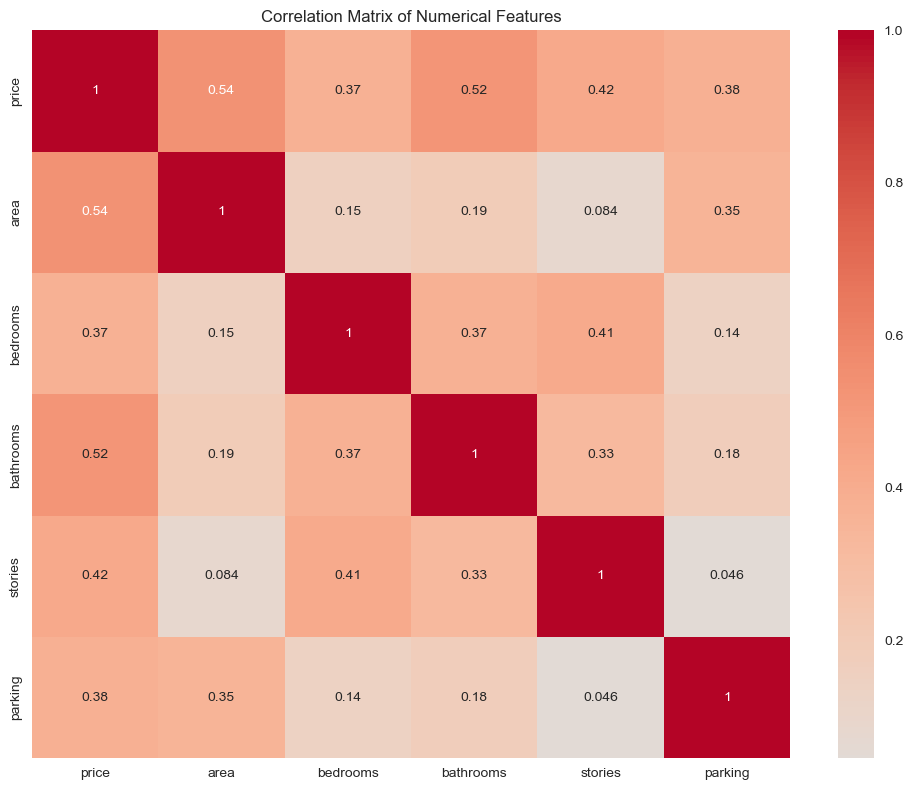


Correlations with Price:
----------------------------------------
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [41]:
# Analyze correlations for numerical features
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Display correlations with price
print("\nCorrelations with Price:")
print("-" * 40)
correlations = correlation_matrix['price'].sort_values(ascending=False)
print(correlations)

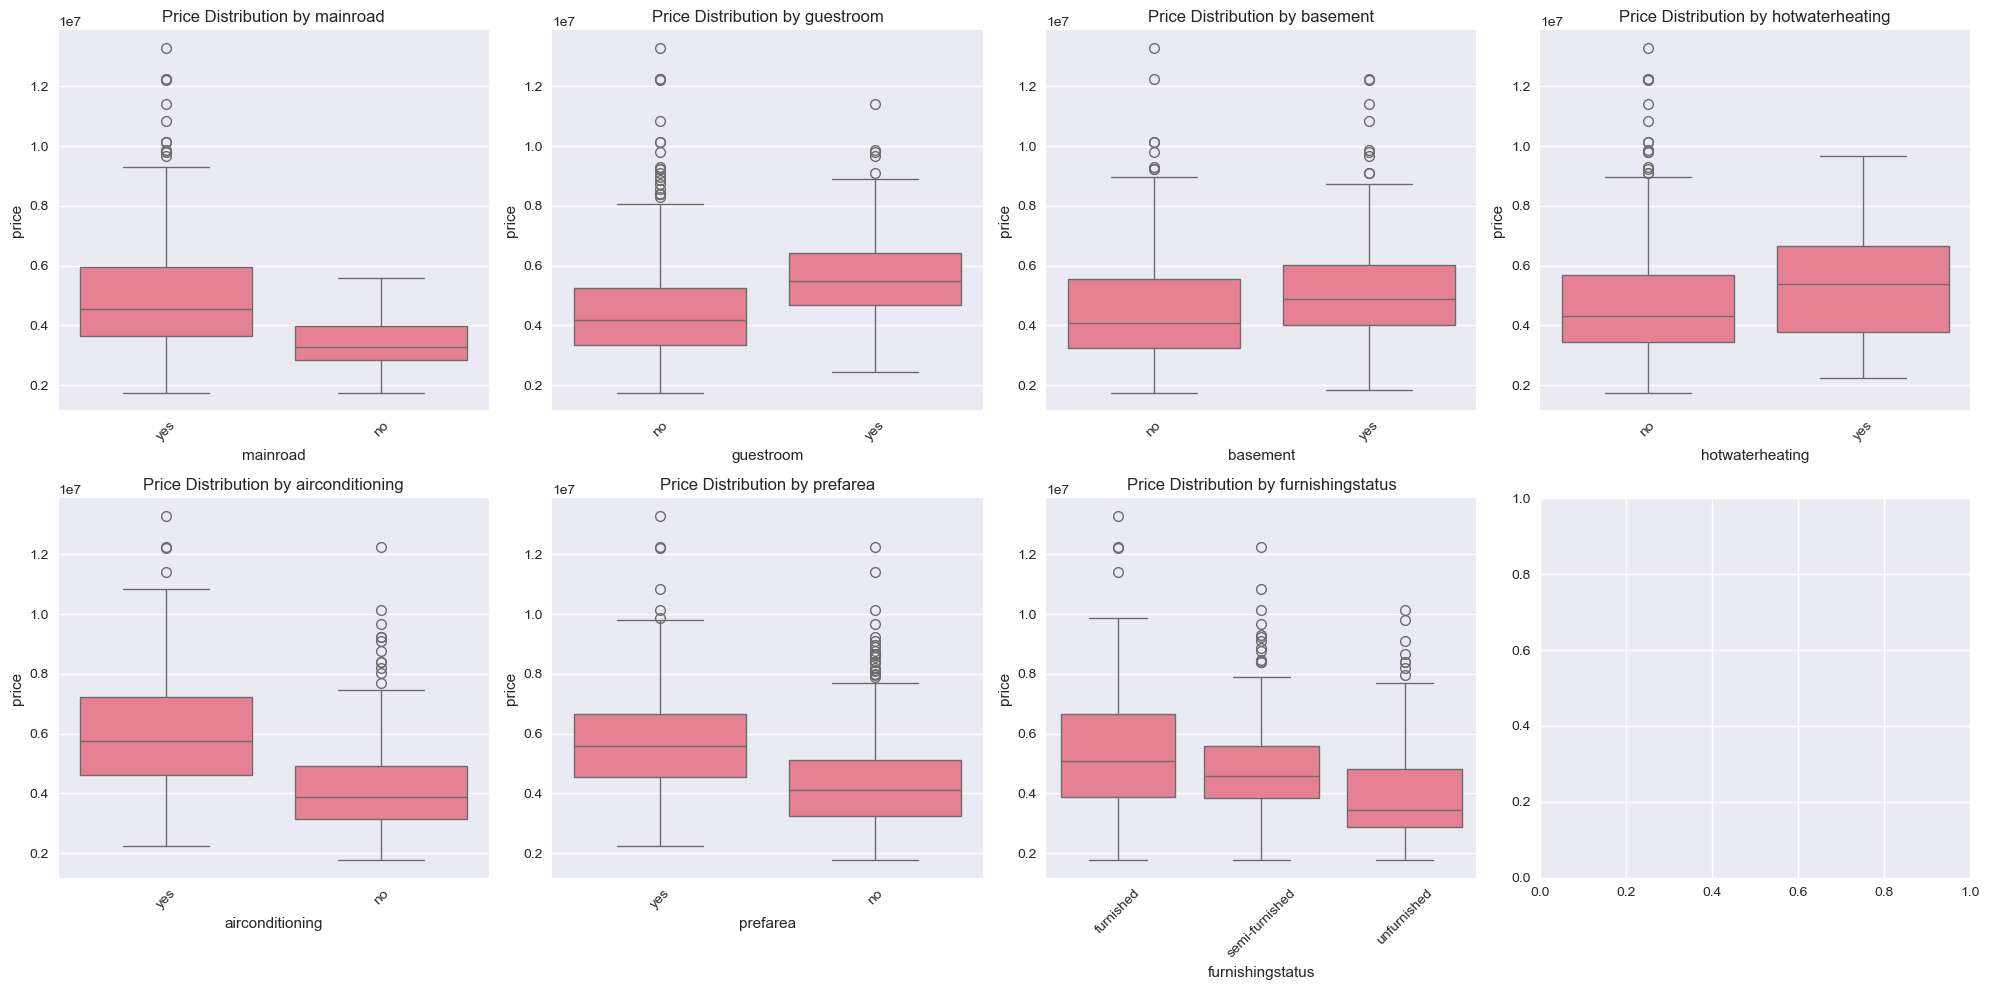


Average Prices by Categories:
----------------------------------------

mainroad:
mainroad
yes    4.991777e+06
no     3.398905e+06
Name: price, dtype: float64

guestroom:
guestroom
yes    5.792897e+06
no     4.544546e+06
Name: price, dtype: float64

basement:
basement
yes    5.242615e+06
no     4.509966e+06
Name: price, dtype: float64

hotwaterheating:
hotwaterheating
yes    5.559960e+06
no     4.728593e+06
Name: price, dtype: float64

airconditioning:
airconditioning
yes    6.013221e+06
no     4.191940e+06
Name: price, dtype: float64

prefarea:
prefarea
yes    5.879046e+06
no     4.425299e+06
Name: price, dtype: float64

furnishingstatus:
furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64


In [42]:
# Analyze categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                      'airconditioning', 'prefarea', 'furnishingstatus']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

# Plot average price for each categorical feature
for idx, feature in enumerate(categorical_features):
    sns.boxplot(data=df, x=feature, y='price', ax=axes[idx])
    axes[idx].set_title(f'Price Distribution by {feature}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print average prices for each category
print("\nAverage Prices by Categories:")
print("-" * 40)
for feature in categorical_features:
    print(f"\n{feature}:")
    print(df.groupby(feature)['price'].mean().sort_values(ascending=False))

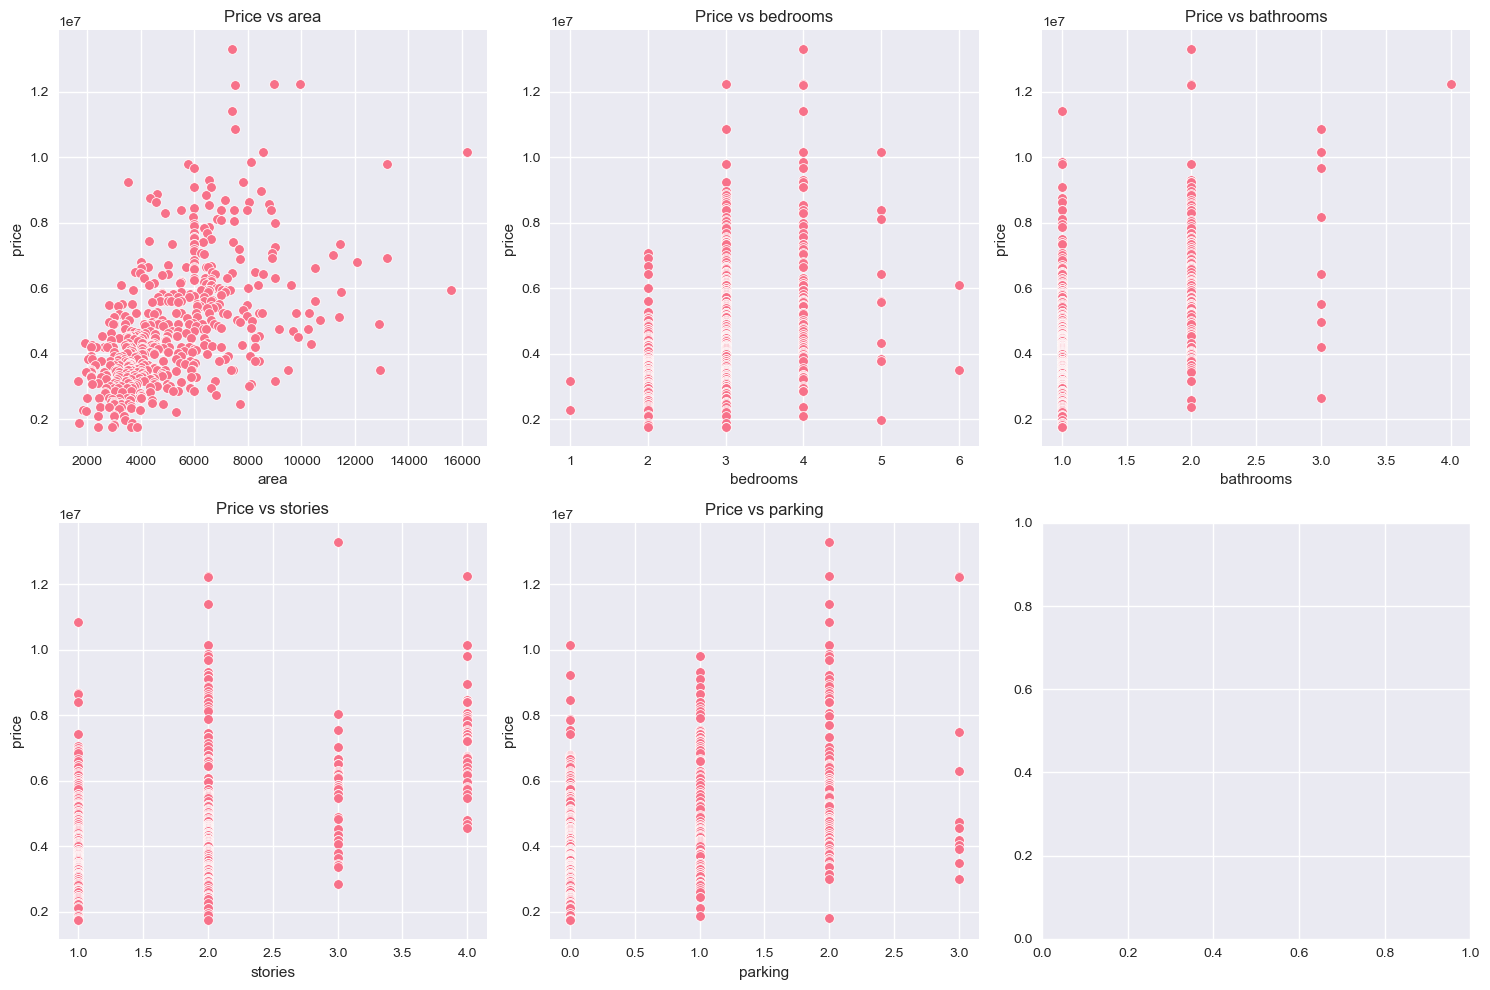


Summary Statistics for Numerical Features:
----------------------------------------
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [43]:
# Analyze distributions of numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    if feature != 'price':  # Skip price as it's our target variable
        sns.scatterplot(data=df, x=feature, y='price', ax=axes[idx-1])
        axes[idx-1].set_title(f'Price vs {feature}')

plt.tight_layout()
plt.show()

# Display summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print("-" * 40)
print(df[numerical_features].describe())

In [44]:
# Select features for prediction
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                       'airconditioning', 'prefarea', 'furnishingstatus'])

# Select features (X) and target variable (y)
features = df_encoded.drop('price', axis=1)
target = df_encoded['price']

print("Selected features:", features.columns.tolist())
print("\nShape of features:", features.shape)
print("Shape of target:", target.shape)

Selected features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes', 'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

Shape of features: (545, 20)
Shape of target: (545,)


In [45]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [46]:
# Train and evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("-" * 40)
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Mean Square Error: {mse:.2f}")

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 10 Most Important Features:")
print("-" * 40)
display(feature_importance.head(10))

Model Performance Metrics:
----------------------------------------
R² Score: 0.6529
Root Mean Square Error: 1324506.96
Mean Square Error: 1754318687330.67

Top 10 Most Important Features:
----------------------------------------


,Feature,Coefficient
2,bathrooms,549420.501241
0,area,511615.563777
3,stories,353158.429856
4,parking,193542.781675
14,airconditioning_yes,183908.947458
13,airconditioning_no,-183908.947458
16,prefarea_yes,133509.330406
15,prefarea_no,-133509.330406
19,furnishingstatus_unfurnished,-106620.372430
10,basement_yes,93097.075253


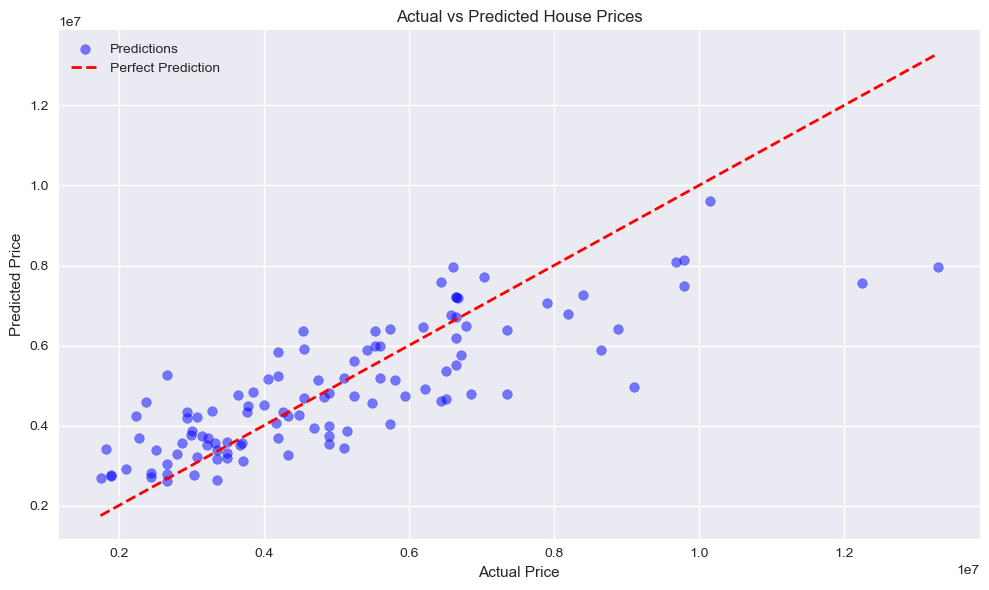

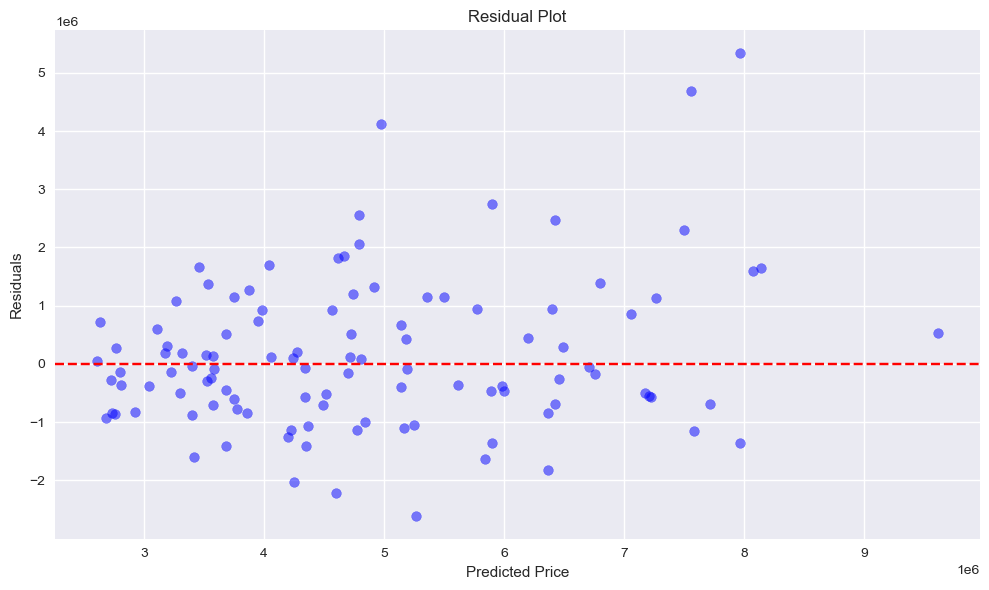

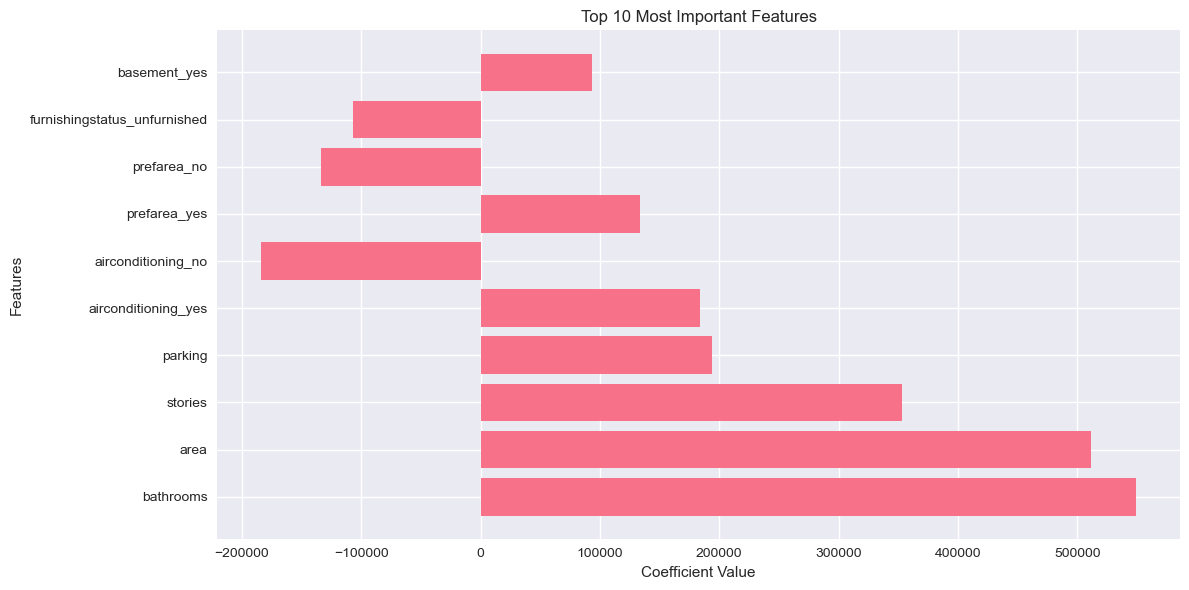

In [47]:
# Visualize actual vs predicted prices
import matplotlib.pyplot as plt

# Create figure for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot top 10 feature importance
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.title('Top 10 Most Important Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [48]:
# Function to make predictions with user input
def predict_house_price():
    # Get user input for all features
    print("Please enter the following details about the house:")
    
    # Numerical features
    area = float(input("Area (sq ft): "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    parking = int(input("Number of parking spaces: "))
    
    # Categorical features (yes/no)
    mainroad = input("Is it on the main road? (yes/no): ").lower()
    guestroom = input("Does it have a guest room? (yes/no): ").lower()
    basement = input("Does it have a basement? (yes/no): ").lower()
    hotwaterheating = input("Does it have hot water heating? (yes/no): ").lower()
    airconditioning = input("Does it have air conditioning? (yes/no): ").lower()
    prefarea = input("Is it in a preferred area? (yes/no): ").lower()
    
    # Furnishing status
    print("\nFurnishing status options: furnished, semi-furnished, unfurnished")
    furnishingstatus = input("Enter furnishing status: ").lower()
    
    # Create a dictionary with the input values
    input_data = {
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'stories': stories,
        'parking': parking,
        'mainroad': mainroad,
        'guestroom': guestroom,
        'basement': basement,
        'hotwaterheating': hotwaterheating,
        'airconditioning': airconditioning,
        'prefarea': prefarea,
        'furnishingstatus': furnishingstatus
    }
    
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Apply the same one-hot encoding
    input_encoded = pd.get_dummies(input_df, columns=['mainroad', 'guestroom', 'basement', 
                                                     'hotwaterheating', 'airconditioning', 
                                                     'prefarea', 'furnishingstatus'])
    
    # Ensure the input DataFrame has all the same columns as the training data
    for col in features.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    
    # Reorder columns to match training data
    input_encoded = input_encoded[features.columns]
    
    # Scale the features
    input_scaled = scaler.transform(input_encoded)
    
    # Make prediction
    predicted_price = model.predict(input_scaled)[0]
    
    print("\nPredicted House Price: {:.2f}".format(predicted_price))
    return predicted_price

In [49]:
# Make a prediction with user input
print("Enter house details to get a price prediction")
print("-" * 40)
predicted_price = predict_house_price()

Enter house details to get a price prediction
----------------------------------------
Please enter the following details about the house:

Furnishing status options: furnished, semi-furnished, unfurnished

Furnishing status options: furnished, semi-furnished, unfurnished

Predicted House Price: 7969928.21

Predicted House Price: 7969928.21


In [50]:
# Save the model, scaler, and features list for the Streamlit app
import joblib

# Save the trained model
joblib.dump(model, 'house_price_model.joblib')

# Save the scaler
joblib.dump(scaler, 'house_price_scaler.joblib')

# Save the features list
joblib.dump(features.columns.tolist(), 'house_price_features.joblib')

print("Model and associated files saved successfully!")

Model and associated files saved successfully!
